<a href="https://colab.research.google.com/github/dongzooo/Data-Analysis/blob/main/%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(Linear_Regression_)%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## auto-mpg 샘플
import numpy as np
import pandas as pd # data를 다루기 위한 라이브러리 dataframe 
# 아래의 두개는 차트 라이브러리 
import matplotlib.pyplot as plt
import seaborn as sns 


In [ ]:
data = pd.read_csv("auto-mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# data.shape
data.info()  # dataframe의 기본적 정보를 나타냄


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
data.describe() # 기본적으로 숫자형 데이터에 한해 describe 명령을 수행함 

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# data.horsepower
data['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: object

In [ ]:
# True와 False는 기본적으로 1과 0이기 (boolean) 때문에 연산이 가능 
sum(data.horsepower=='?')


6

In [ ]:
# horsepower가 ?인 것들은 분석 대상에서 제외
data = data[data.horsepower!='?'] ## 프로그래밍에서는 동일여부를 == 판단, 같지 않으면 != 


In [ ]:
sum(data.horsepower!='?')

392

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [ ]:
data.horsepower = data.horsepower.astype('int64')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [ ]:
data['car name'].value_counts() # database의 group by count와 같은 역할을 함 


toyota corolla           5
amc matador              5
ford pinto               5
ford maverick            4
chevrolet chevette       4
                        ..
saab 99gle               1
amc ambassador dpl       1
pontiac firebird         1
amc ambassador sst       1
toyota corona mark ii    1
Name: car name, Length: 301, dtype: int64

In [ ]:
data['car name'].fillna('no_name')

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 392, dtype: object

In [ ]:
c = [i[0] for i in data['car name'].str.split(' ')]



In [ ]:
data['car name'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [ ]:
data['car name'] = data['car name'].replace(['chevrolet', 'chevy', 'chevroelt'], 'chevrolet')
data['car name'] = data['car name'].replace(['volkswagen', 'vw', 'vokswagen'], 'volkswagen')
data['car name'] = data['car name'].replace(['mazda', 'maxda'], 'mazda')
data['car name'] = data['car name'].replace(['toyota', 'toyouta'], 'toyota')
data['car name'] = data['car name'].replace(['mercedes-benz', 'mercedes'], 'mercedes-benz')


In [ ]:
len(data['car name'].unique())

30

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


(array([13., 78., 73., 58., 53., 48., 37., 22.,  4.,  6.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <a list of 10 Patch objects>)

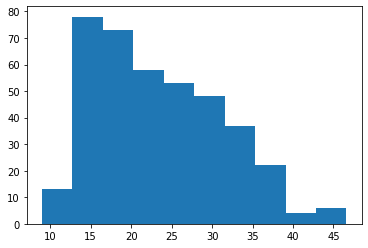

In [ ]:
plt.hist(data.mpg)

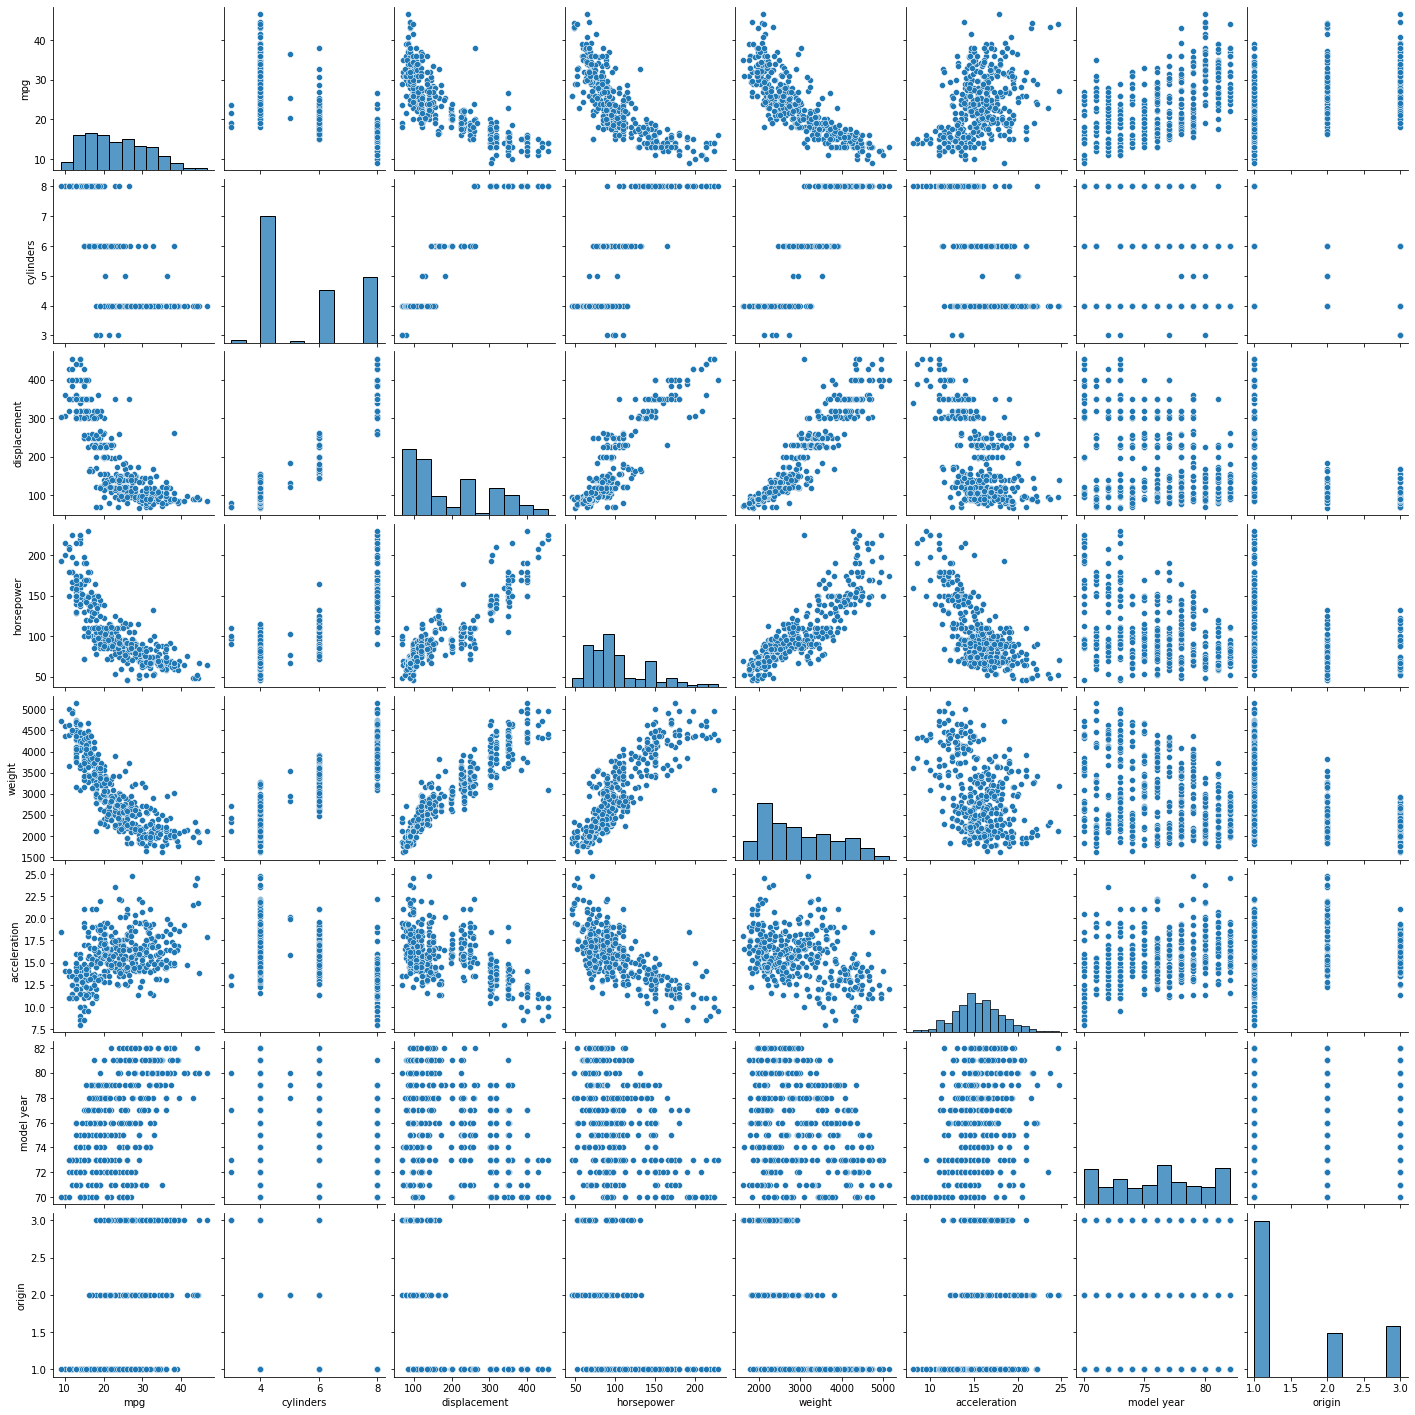

In [ ]:
# sns.pairplot(data)

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford


In [ ]:
data['model year'].value_counts()

73    40
78    36
76    34
82    30
75    30
79    29
70    29
81    28
77    28
72    28
80    27
71    27
74    26
Name: model year, dtype: int64

In [ ]:
data['origin'].value_counts()

1    245
3     79
2     68
Name: origin, dtype: int64

In [ ]:
# regression 시작 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
data = pd.concat([data, pd.get_dummies(data.origin, prefix='origin')], axis=1)
data.drop('origin', axis=1, inplace=True)

# pd.concat() 


In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130,3504,12.0,70,chevrolet,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford,1,0,0


In [ ]:
data = pd.concat([data, pd.get_dummies(data.cylinders, prefix='cylinders')], axis=1)
data.drop('cylinders', axis=1, inplace=True)

data = pd.concat([data, pd.get_dummies(data['model year'], prefix='model year')], axis=1)
data.drop('model year', axis=1, inplace=True)


In [ ]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,307.0,130,3504,12.0,chevrolet,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165,3693,11.5,buick,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150,3436,11.0,plymouth,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150,3433,12.0,amc,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140,3449,10.5,ford,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 정규화, standardize 
data[['displacement','horsepower','weight','acceleration']] = StandardScaler().fit_transform(data[['displacement','horsepower','weight','acceleration']])

In [ ]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,car name,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82
0,18.0,1.077290,0.664133,0.620540,-1.285258,chevrolet,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,1.488732,1.574594,0.843334,-1.466724,buick,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,1.182542,1.184397,0.540382,-1.648189,plymouth,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16.0,1.048584,1.184397,0.536845,-1.285258,amc,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,1.029447,0.924265,0.555706,-1.829655,ford,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


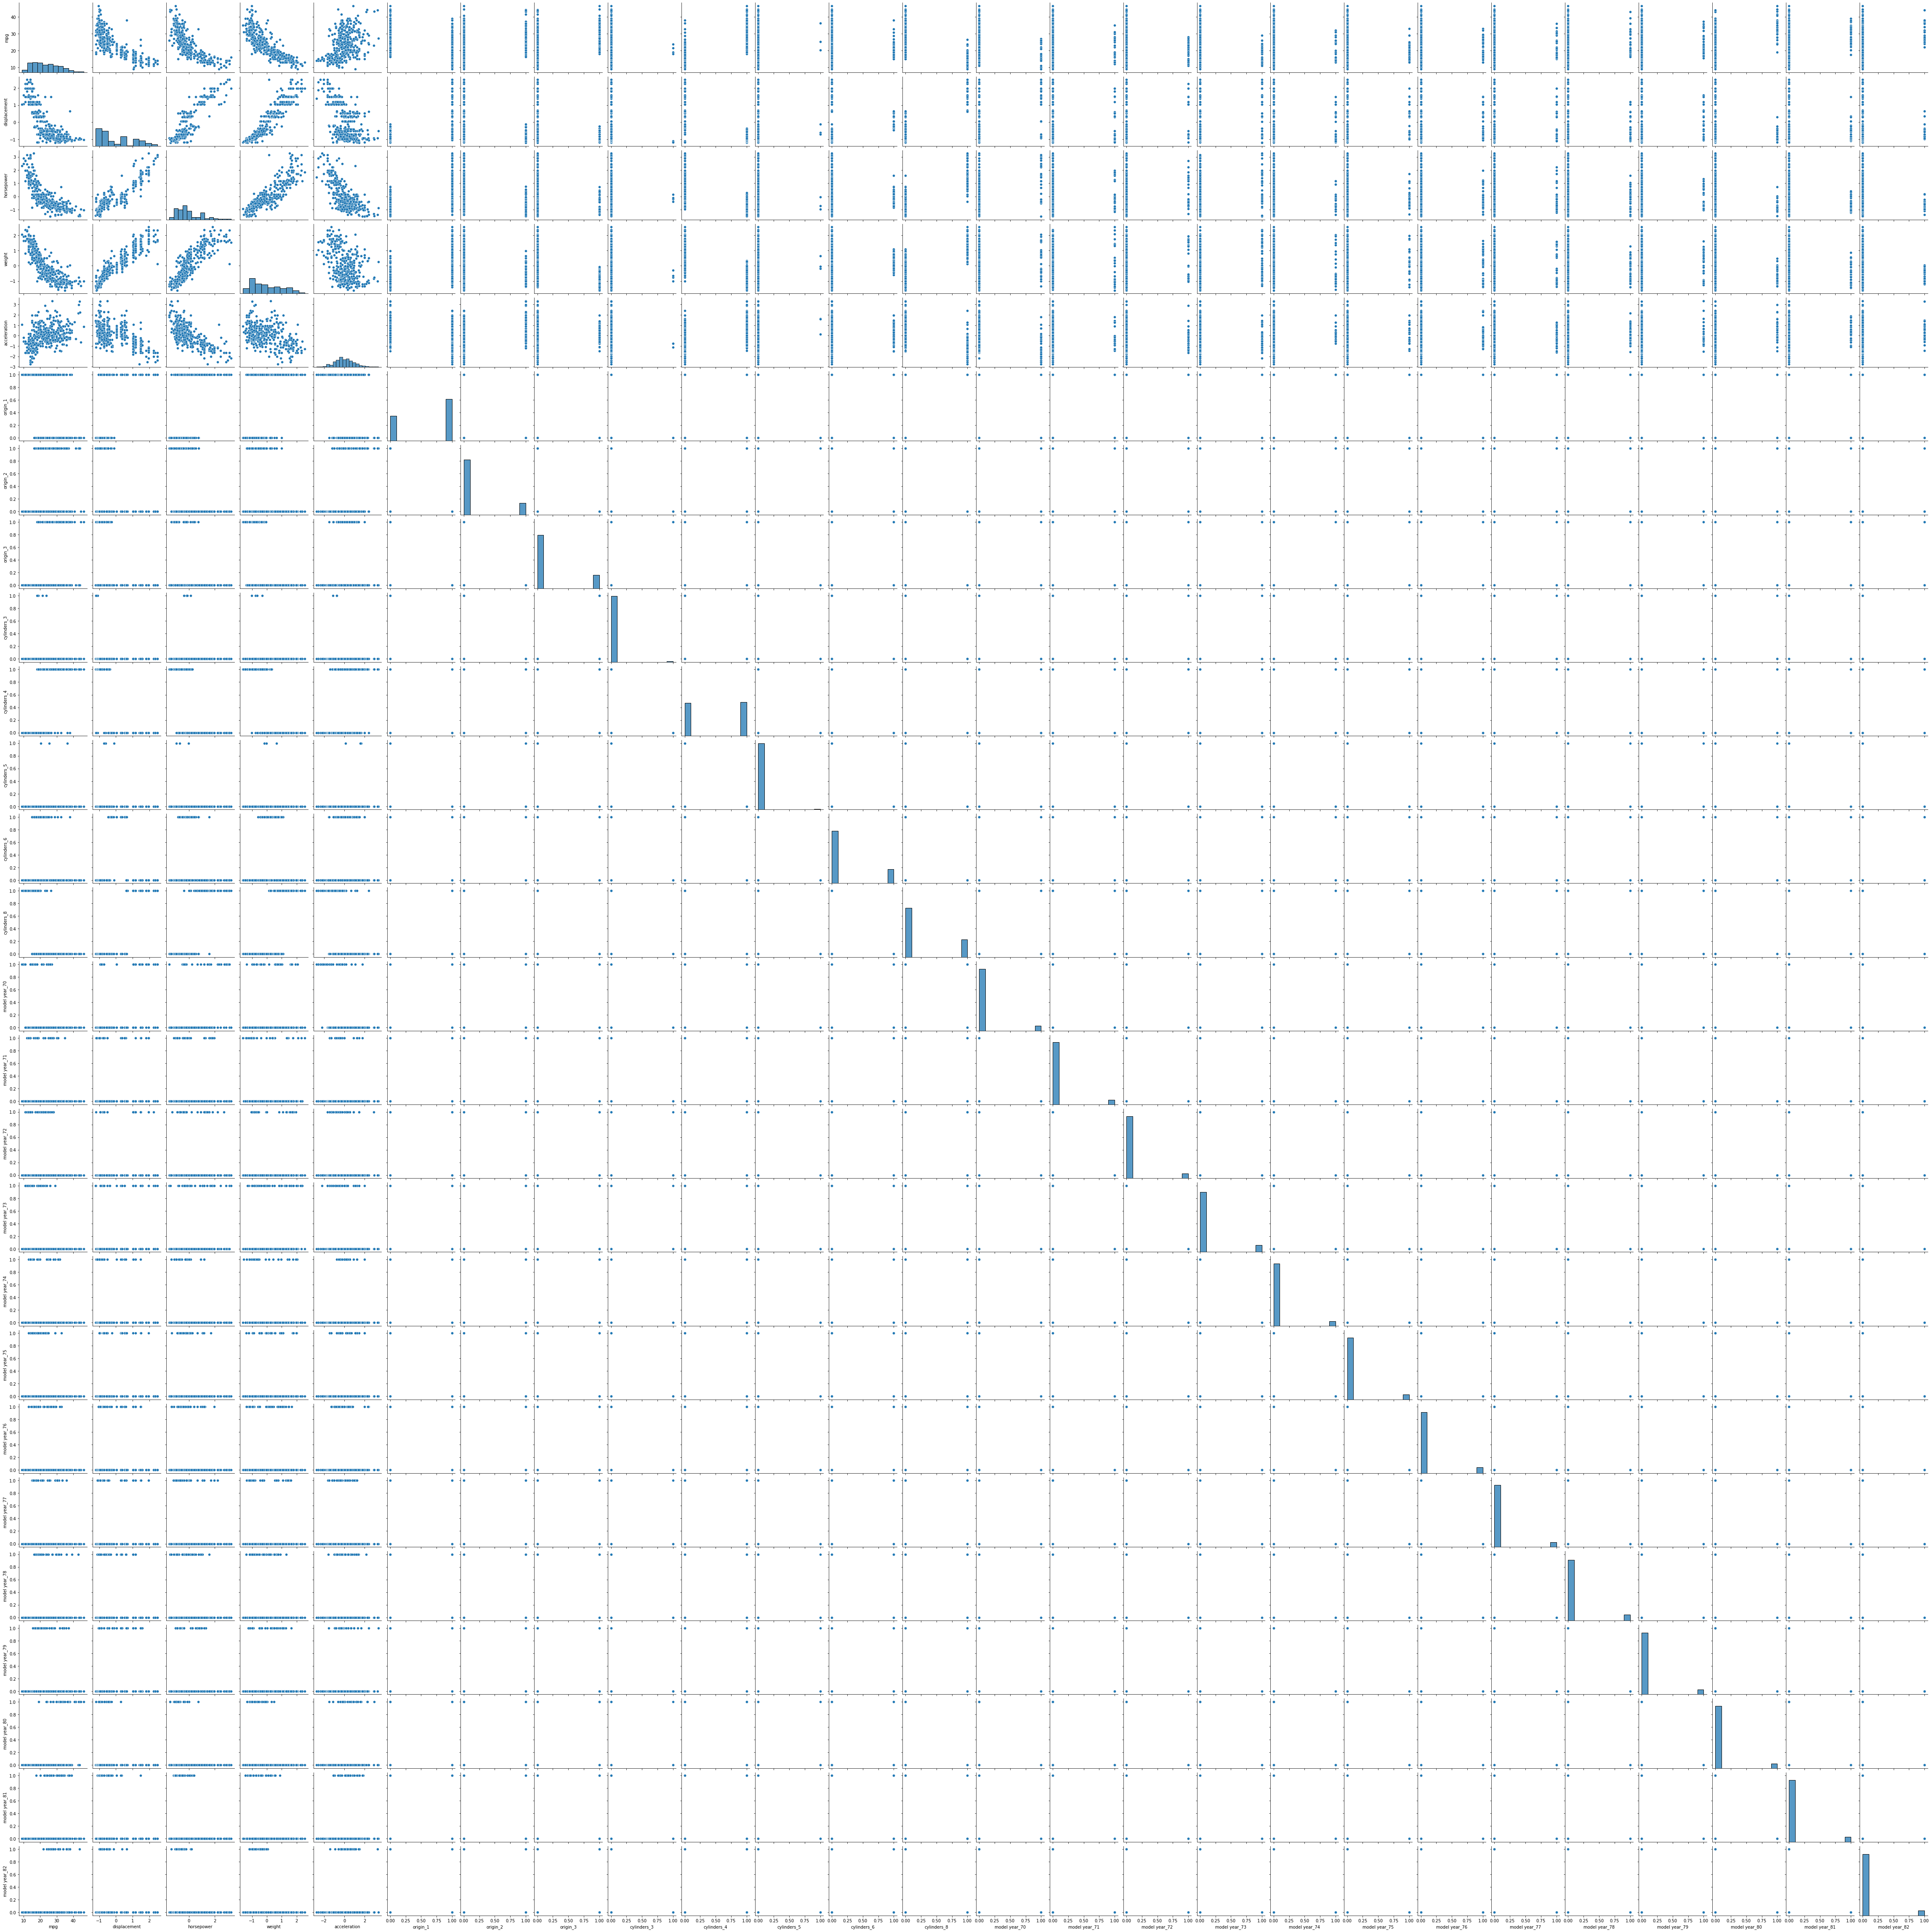

In [ ]:
# sns.pairplot(data)


In [ ]:
data = pd.concat([data, pd.get_dummies(data['car name'], prefix='name')], axis=1)
data.drop('car name', axis=1, inplace=True)

In [ ]:
data.head()

,mpg,displacement,horsepower,weight,acceleration,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,name_amc,name_audi,name_bmw,name_buick,name_cadillac,name_capri,name_chevrolet,name_chrysler,name_datsun,name_dodge,name_fiat,name_ford,name_hi,name_honda,name_mazda,name_mercedes-benz,name_mercury,name_nissan,name_oldsmobile,name_opel,name_peugeot,name_plymouth,name_pontiac,name_renault,name_saab,name_subaru,name_toyota,name_triumph,name_volkswagen,name_volvo
0,18.0,1.077290,0.664133,0.620540,-1.285258,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,15.0,1.488732,1.574594,0.843334,-1.466724,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18.0,1.182542,1.184397,0.540382,-1.648189,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,16.0,1.048584,1.184397,0.536845,-1.285258,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.0,1.029447,0.924265,0.555706,-1.829655,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
## 윗 부분은 데이터 전처리 부분 

## 아래부터 모델링 시작 
## 데이터를 독립변수와 종속변수 (예측대상) 을 구분
## train 데이터와 validation 데이터를 구분
y = data.pop('mpg')
X = data

In [ ]:
X.head()

,displacement,horsepower,weight,acceleration,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,name_amc,name_audi,name_bmw,name_buick,name_cadillac,name_capri,name_chevrolet,name_chrysler,name_datsun,name_dodge,name_fiat,name_ford,name_hi,name_honda,name_mazda,name_mercedes-benz,name_mercury,name_nissan,name_oldsmobile,name_opel,name_peugeot,name_plymouth,name_pontiac,name_renault,name_saab,name_subaru,name_toyota,name_triumph,name_volkswagen,name_volvo
0,1.077290,0.664133,0.620540,-1.285258,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.488732,1.574594,0.843334,-1.466724,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.182542,1.184397,0.540382,-1.648189,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.048584,1.184397,0.536845,-1.285258,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.029447,0.924265,0.555706,-1.829655,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.head()
# X_test.head()
# y_train.head()
# y_test.head()


,displacement,horsepower,weight,acceleration,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,model year_70,model year_71,model year_72,model year_73,model year_74,model year_75,model year_76,model year_77,model year_78,model year_79,model year_80,model year_81,model year_82,name_amc,name_audi,name_bmw,name_buick,name_cadillac,name_capri,name_chevrolet,name_chrysler,name_datsun,name_dodge,name_fiat,name_ford,name_hi,name_honda,name_mazda,name_mercedes-benz,name_mercury,name_nissan,name_oldsmobile,name_opel,name_peugeot,name_plymouth,name_pontiac,name_renault,name_saab,name_subaru,name_toyota,name_triumph,name_volkswagen,name_volvo
284,0.292679,0.143869,0.450793,0.384226,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
46,-0.520637,-0.844632,-0.671427,1.255261,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,1.029447,0.924265,1.551794,0.166467,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
271,-0.367542,0.013803,-0.274171,0.420519,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
393,-0.520637,-0.480448,-0.221125,0.021294,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(X_test)
mean_squared_error(y_pred, y_test)

2.021174695234474e+23

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-3.0168368147052967e+21

In [ ]:
r_sq = lr.score(X_test, y_pred)
intercept = lr.intercept_
coefficient = lr.coef_

print('r sqaure: ', r_sq)
print('intercept: ', intercept)
print('coefficient: ', coefficient)

r sqaure:  1.0
intercept:  21345397178596.695
coefficient:  [-5.00301728e-03 -2.53232710e+00 -2.95461840e+00 -8.15143318e-02
 -2.55687437e+13 -3.02697746e+13 -3.08626276e+13  1.04690650e+13
  1.04690650e+13  1.04690650e+13  1.04690650e+13  1.04690650e+13
 -1.36212087e+12 -1.36212087e+12 -1.36212087e+12 -1.36212087e+12
 -1.36212087e+12 -1.36212087e+12 -1.36212087e+12 -1.36212087e+12
 -1.36212087e+12 -1.36212087e+12 -1.36212087e+12 -1.36212087e+12
 -1.36212087e+12 -4.88359756e+12 -1.82566628e+11 -1.82566628e+11
 -4.88359756e+12 -4.88359756e+12 -4.88359756e+12 -4.88359756e+12
 -4.88359756e+12  4.10286323e+11 -4.88359756e+12 -1.82566628e+11
 -4.88359756e+12  3.44298730e+07  4.10286323e+11  4.10286323e+11
 -1.82566628e+11 -4.88359756e+12  4.10286323e+11 -4.88359756e+12
 -1.82566628e+11 -1.82566628e+11 -4.88359756e+12 -4.88359756e+12
 -1.82566628e+11 -1.82566628e+11  4.10286323e+11  4.10286323e+11
 -1.82566628e+11 -1.82566628e+11 -1.82566628e+11]
